In [31]:
import numpy as np
from sympy import symbols, lambdify, sympify, diff
from matplotlib import pyplot as plt 
from math import exp,sin 

In [32]:

# Перетворюємо рядок з формулою на sympy випар

#func = sympify(input("Enter func"))
#f_expr = func
f_expr = sympify(' exp(x)-1')   # x**3 - 13*x +5

df_expr = diff(f_expr, 'x')
df_expr2 = diff(df_expr, 'x')
print(f_expr, df_expr,df_expr2, sep = '\n')

exp(x) - 1
exp(x)
exp(x)


In [33]:
# Перетворюємо sympy вираз на функцію з єдиним аргументом х
x_arg = symbols('x')
f = lambdify(x_arg, f_expr)
df = lambdify(x_arg, df_expr)
d2f = lambdify(x_arg, df_expr2)

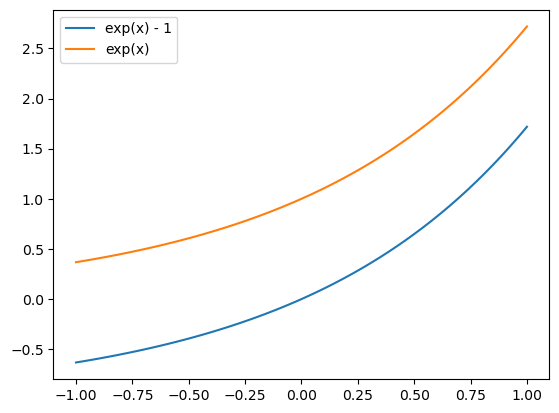

In [34]:
x = np.linspace(-1, 1, 101)
plt.plot(x, f(x), label=f_expr)
plt.plot(x, df(x), label=df_expr)
plt.legend()

In [35]:

def newton_method(f, x0, x1, max_iter=10):
    
    print("dfx0: ",df(x0))
    print("dfx1: ", df(x1))
    print("d2fx0: ",d2f(x0))
    print("d2fx1: ", d2f(x1))
    if df(x0) * df(x1) < 0 or d2f(x0) * d2f(x1)<0:
        print('The derivative change sign on the interval [x0, x1].')
        return
    if df(x0) * d2f(x0) >0 :
        xi =x1
    else:
        xi = x0
    x_values = [xi]
    f_values = [f(xi)]
    
    x_mesh = np.linspace(x0, x1, 101)
    
    plt.figure(figsize=(8, 6))
    plt.plot(x_mesh, f(x_mesh), label='f(x)')
    plt.axhline(0, color='red', linestyle='--', label='y=0')
    
    for i in range(max_iter):
        slope = df(xi)
        if df(xi) == 0:
            print("Derivative in xi is zero")
            return
        
        # Calculate the tangent line
        tangent_x = np.linspace(xi - f(xi) / slope, xi, 101)
        tangent_line = f(xi) + slope * (tangent_x - xi)
        
        xi = xi - f(xi) / slope
        x_values.append(xi)
        f_values.append(f(xi))
        
        plt.scatter([xi], [f(xi)], c='green', label='Iteration' if i == 0 else '', zorder=5)
        plt.plot(tangent_x, tangent_line, linestyle='--', c='black', label='Tangent' if i == 0 else '')
        print(f'{xi:.4f}: {f(xi):.4f}')

    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    plt.title('Newton Method')
    plt.show()

dfx0:  0.36787944117144233
dfx1:  7.38905609893065
d2fx0:  0.36787944117144233
d2fx1:  7.38905609893065
1.1353: 2.1122
0.4566: 0.5788
0.0901: 0.0942
0.0039: 0.0039
0.0000: 0.0000
0.0000: 0.0000
0.0000: 0.0000
0.0000: 0.0000
0.0000: 0.0000
0.0000: 0.0000
0.0000: 0.0000
0.0000: 0.0000
0.0000: 0.0000
0.0000: 0.0000
0.0000: 0.0000
0.0000: 0.0000


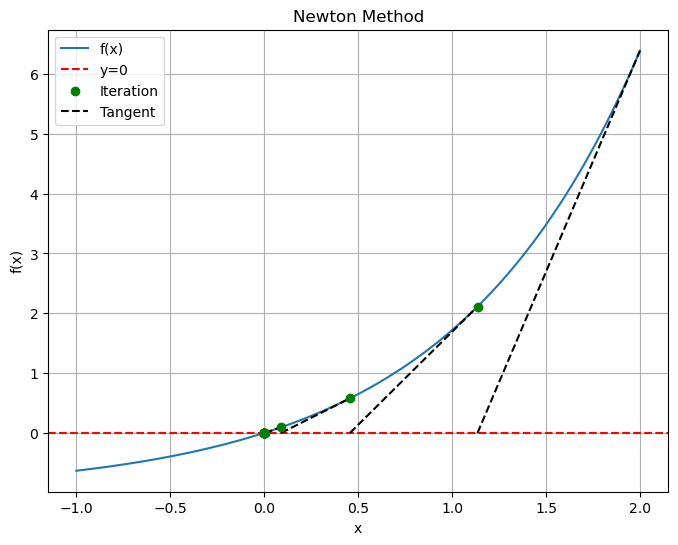

In [36]:
newton_method(f,-1, 2, max_iter=16)